In [1]:
import os
import fnmatch
import pprint

import numpy as np
import scipy.io as sio
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import HTML

def scatter3(X,col,xlims=(3,3),ylims=(3,3),zlims=(3,3)):
    sns.set_style("whitegrid")
    plt.ion()
    fig = plt.figure(figsize=(4,4))    
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X[:,0], X[:,1], X[:,2],s=1,alpha=1,c=col)

    ax.set_xticks([])
    ax.set_zticks([])
    ax.set_yticks([])
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_zlabel('')
    
    ax.set_xlim(xlims[0],xlims[1])
    ax.set_ylim(ylims[0],ylims[1])
    ax.set_zlim(zlims[0],zlims[1])

    plt.axis('on')
    ax.set_frame_on(False)
    plt.tight_layout()
    return ax,sc

In [2]:
import fnmatch
import os
import pprint
from tqdm import tqdm
import numpy as np
import pandas as pd
import scipy.io as sio
from sklearn.decomposition import PCA
from analysis_clustering_helpers import get_cvfold_extended

cvsets_pth    = './data/results/patchseq/'
metadata_file = './data/raw/PS_v2_beta_0-4.mat'
matfile   = sio.loadmat(metadata_file,squeeze_me=True)

padval=-210
fontsizeval=10

**$\lambda$ = 1.0** representations:

In [3]:
csval='1-0'
xlims=(-3,2)
ylims=(-3,2)
zlims=(-2,3)

In [4]:
#Pick one of the cross validation sets:
file_list = sorted([file for file in os.listdir(cvsets_pth) if 'cs_'+csval+'_' in file])
file_list = [file for file in file_list if '.mat' in file]
_,_,train_leaf,val_leaf = get_cvfold_extended(cvfile=cvsets_pth+file_list[0],refdata=matfile)

#Plot training and validation data in the same plot
T = np.concatenate([train_leaf['T_z'],val_leaf['T_z']])
E = np.concatenate([train_leaf['E_z'],val_leaf['E_z']])
col = np.concatenate([train_leaf['color'],val_leaf['color']])

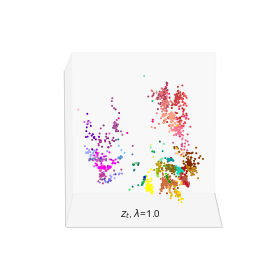

In [5]:
ax,sc = scatter3(T,col,xlims,ylims,zlims)
ax.set_title(r'$z_t$, $\lambda$='+csval.replace('-','.'),pad=padval,fontsize=fontsizeval)
fig = plt.gcf()

def update(i):
    ax.view_init(elev=10., azim=i)
    fig.canvas.draw()
    fig.canvas.flush_events()
    return

anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
HTML(anim.to_html5_video())

In [6]:
anim.save('/Users/fruity/Dropbox/AllenInstitute/CellTypes/doc/NeurIPS 2019/camready/representation_T_z_'+csval+'.gif', dpi=160, writer='imagemagick')

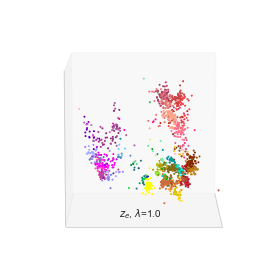

In [7]:
ax,sc = scatter3(E,col,xlims,ylims,zlims)
ax.set_title(r'$z_e$, $\lambda$='+csval.replace('-','.'),pad=padval,fontsize=fontsizeval)
fig = plt.gcf()

def update(i):
    ax.view_init(elev=10., azim=i)
    fig.canvas.draw()
    fig.canvas.flush_events()
    return

anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
HTML(anim.to_html5_video())

In [8]:
anim.save('/Users/fruity/Dropbox/AllenInstitute/CellTypes/doc/NeurIPS 2019/camready/representation_E_z_'+csval+'.gif', dpi=160, writer='imagemagick')

**$\lambda$ = 0**

In [9]:
csval='0-0'
xlims=(-3,3)
ylims=(-3,3)
zlims=(-3,3)

In [10]:
#Pick one of the cross validation sets:
file_list = sorted([file for file in os.listdir(cvsets_pth) if 'cs_'+csval+'_' in file])
file_list = [file for file in file_list if '.mat' in file]
_,_,train_leaf,val_leaf = get_cvfold_extended(cvfile=cvsets_pth+file_list[0],refdata=matfile)

#Plot training and validation data in the same plot
T = np.concatenate([train_leaf['T_z'],val_leaf['T_z']])
E = np.concatenate([train_leaf['E_z'],val_leaf['E_z']])
col = np.concatenate([train_leaf['color'],val_leaf['color']])

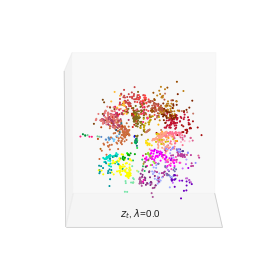

In [11]:
ax,sc = scatter3(T,col,xlims,ylims,zlims)
ax.set_title(r'$z_t$, $\lambda$='+csval.replace('-','.'),pad=padval,fontsize=fontsizeval)
fig = plt.gcf()

def update(i):
    ax.view_init(elev=10., azim=i)
    fig.canvas.draw()
    fig.canvas.flush_events()
    return

anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
HTML(anim.to_html5_video())

In [12]:
anim.save('/Users/fruity/Dropbox/AllenInstitute/CellTypes/doc/NeurIPS 2019/camready/representation_T_z_'+csval+'.gif', dpi=160, writer='imagemagick')

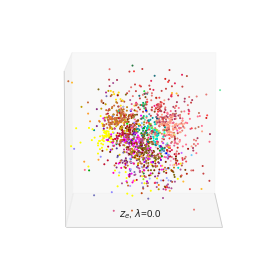

In [13]:
ax,sc = scatter3(E,col,xlims,ylims,zlims)
ax.set_title(r'$z_e$, $\lambda$='+csval.replace('-','.'),pad=padval,fontsize=fontsizeval)
fig = plt.gcf()

def update(i):
    ax.view_init(elev=10., azim=i)
    fig.canvas.draw()
    fig.canvas.flush_events()
    return

anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
HTML(anim.to_html5_video())

In [14]:
anim.save('/Users/fruity/Dropbox/AllenInstitute/CellTypes/doc/NeurIPS 2019/camready/representation_E_z_'+csval+'.gif', dpi=160, writer='imagemagick')

**$\lambda$ = 10**

In [3]:
csval='10-0'
xlims=(-3,3)
ylims=(-3,3)
zlims=(-3,3)

In [4]:
#Pick one of the cross validation sets:
file_list = sorted([file for file in os.listdir(cvsets_pth) if 'cs_'+csval+'_' in file])
file_list = [file for file in file_list if '.mat' in file]
_,_,train_leaf,val_leaf = get_cvfold_extended(cvfile=cvsets_pth+file_list[0],refdata=matfile)

#Plot training and validation data in the same plot
T = np.concatenate([train_leaf['T_z'],val_leaf['T_z']])
E = np.concatenate([train_leaf['E_z'],val_leaf['E_z']])
col = np.concatenate([train_leaf['color'],val_leaf['color']])

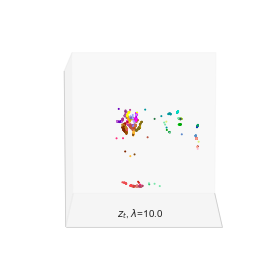

In [5]:
ax,sc = scatter3(T,col,xlims,ylims,zlims)
ax.set_title(r'$z_t$, $\lambda$='+csval.replace('-','.'),pad=padval,fontsize=fontsizeval)
fig = plt.gcf()

def update(i):
    ax.view_init(elev=10., azim=i)
    fig.canvas.draw()
    fig.canvas.flush_events()
    return

anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
HTML(anim.to_html5_video())

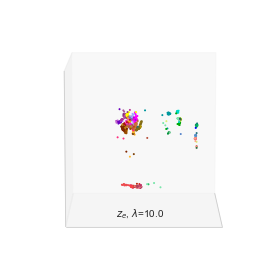

In [6]:
ax,sc = scatter3(E,col,xlims,ylims,zlims)
ax.set_title(r'$z_e$, $\lambda$='+csval.replace('-','.'),pad=padval,fontsize=fontsizeval)
fig = plt.gcf()

def update(i):
    ax.view_init(elev=10., azim=i)
    fig.canvas.draw()
    fig.canvas.flush_events()
    return

anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
HTML(anim.to_html5_video())

**Save $\lambda$ = 1.0 representations for Fig 2B in the main text:**

In [27]:
%matplotlib inline
#Use qt5 to decide azim and elev values

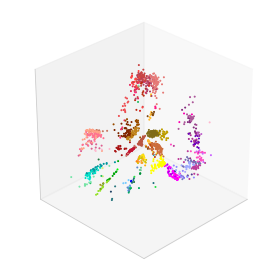

In [28]:
axT,sc = scatter3(T,col,xlims,ylims,zlims)
fT = plt.gcf()
plt.ion()
axT.elev=30
axT.azim=-135
plt.show()

In [ ]:
fT.savefig('/Users/fruity/Dropbox/AllenInstitute/CellTypes/doc/NeurIPS 2019/camready/Fig2B-zT.pdf',
               dpi=300, format='pdf', bbox_inches='tight')

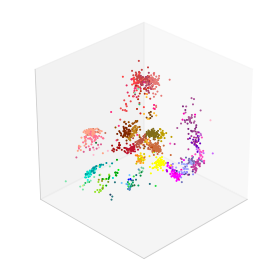

In [29]:
axE,sc = scatter3(E,col,xlims,ylims,zlims)
fE = plt.gcf()
plt.ion()
axE.elev=30
axE.azim=-135
plt.show()

In [ ]:
fE.savefig('/Users/fruity/Dropbox/AllenInstitute/CellTypes/doc/NeurIPS 2019/camready/Fig2B-zE.pdf',
               dpi=300, format='pdf', bbox_inches='tight')